## Dataset [Shoulder Implant X-Ray Manufacturer Classification Data Set](https://archive.ics.uci.edu/ml/datasets/Shoulder+Implant+X-Ray+Manufacturer+Classification)

##Data preprocessing

In [44]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00517/data.zip

--2025-03-06 20:34:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00517/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip.1’

data.zip.1              [  <=>               ]   6.01M  23.6MB/s    in 0.3s    

2025-03-06 20:34:32 (23.6 MB/s) - ‘data.zip.1’ saved [6306316]



In [45]:
!unzip /content/data.zip

Archive:  /content/data.zip
replace data/Tornier.53.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [46]:
import os
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.applications.resnet_v2 import ResNet50V2
from keras.layers import Dropout, Dense, Input
from keras.models import Model, load_model
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
!ls /content/data | wc -l

597


In [48]:
dir = '/content/data'

In [49]:
Cofield_filepaths = [dir + '/'+ file_name for file_name in os.listdir(dir) if 'Cofield' in file_name]
Depuy_filepaths = [dir + '/'+ file_name for file_name in os.listdir(dir) if 'Depuy' in file_name]
Tornier_filepaths = [dir + '/' + file_name for file_name in os.listdir(dir) if 'Tornier' in file_name]
Zimmer_filepaths = [dir + '/' + file_name for file_name in os.listdir(dir) if 'Zimmer' in file_name]

In [50]:
print(Cofield_filepaths)
print(Depuy_filepaths)
print(Tornier_filepaths)
print(Zimmer_filepaths)

['/content/data/Cofield.34.jpg', '/content/data/Cofield.8.jpg', '/content/data/Cofield.72.jpg', '/content/data/Cofield.75.jpg', '/content/data/Cofield.33.jpg', '/content/data/Cofield.11.jpg', '/content/data/Cofield.84.jpg', '/content/data/Cofield.27.jpg', '/content/data/Cofield.17.jpg', '/content/data/Cofield.55.jpg', '/content/data/Cofield.68.jpg', '/content/data/Cofield.12.jpg', '/content/data/Cofield.16.jpg', '/content/data/Cofield.78.jpg', '/content/data/Cofield.62.jpg', '/content/data/Cofield.5.jpg', '/content/data/Cofield.10.jpg', '/content/data/Cofield.88.jpg', '/content/data/Cofield.47.jpg', '/content/data/Cofield.38.jpg', '/content/data/Cofield.13.jpg', '/content/data/Cofield.50.jpg', '/content/data/Cofield.77.jpg', '/content/data/Cofield.26.jpg', '/content/data/Cofield.31.jpg', '/content/data/Cofield.4.jpg', '/content/data/Cofield.21.jpg', '/content/data/Cofield.14.jpg', '/content/data/Cofield.73.jpg', '/content/data/Cofield.37.jpg', '/content/data/Cofield.49.jpg', '/content/

In [51]:
print(len(Cofield_filepaths))
print(len(Depuy_filepaths))
print(len(Tornier_filepaths))
print(len(Zimmer_filepaths))

83
294
71
149


In [52]:
Cofield_filepaths_train = Cofield_filepaths[:int(len(Cofield_filepaths)*0.8)]
Cofield_filepaths_test = Cofield_filepaths[int(len(Cofield_filepaths)*0.8):]
Depuy_filepaths_train = Depuy_filepaths[:int(len(Depuy_filepaths)*0.8)]
Depuy_filepaths_test = Depuy_filepaths[int(len(Depuy_filepaths)*0.8):]
Tornier_filepaths_train = Tornier_filepaths[:int(len(Tornier_filepaths)*0.8)]
Tornier_filepaths_test = Tornier_filepaths[int(len(Tornier_filepaths)*0.8):]
Zimmer_filepaths_train = Zimmer_filepaths[:int(len(Zimmer_filepaths)*0.8)]
Zimmer_filepaths_test = Zimmer_filepaths[int(len(Zimmer_filepaths)*0.8):]

In [53]:
print(len(Cofield_filepaths_train))
print(len((Cofield_filepaths_test)))
print(Cofield_filepaths_train)
print(Cofield_filepaths_test)

66
17
['/content/data/Cofield.34.jpg', '/content/data/Cofield.8.jpg', '/content/data/Cofield.72.jpg', '/content/data/Cofield.75.jpg', '/content/data/Cofield.33.jpg', '/content/data/Cofield.11.jpg', '/content/data/Cofield.84.jpg', '/content/data/Cofield.27.jpg', '/content/data/Cofield.17.jpg', '/content/data/Cofield.55.jpg', '/content/data/Cofield.68.jpg', '/content/data/Cofield.12.jpg', '/content/data/Cofield.16.jpg', '/content/data/Cofield.78.jpg', '/content/data/Cofield.62.jpg', '/content/data/Cofield.5.jpg', '/content/data/Cofield.10.jpg', '/content/data/Cofield.88.jpg', '/content/data/Cofield.47.jpg', '/content/data/Cofield.38.jpg', '/content/data/Cofield.13.jpg', '/content/data/Cofield.50.jpg', '/content/data/Cofield.77.jpg', '/content/data/Cofield.26.jpg', '/content/data/Cofield.31.jpg', '/content/data/Cofield.4.jpg', '/content/data/Cofield.21.jpg', '/content/data/Cofield.14.jpg', '/content/data/Cofield.73.jpg', '/content/data/Cofield.37.jpg', '/content/data/Cofield.49.jpg', '/co

In [54]:
print(len(Depuy_filepaths_train))
print(len((Depuy_filepaths_test)))
print(Depuy_filepaths_train)
print(Depuy_filepaths_test)

235
59
['/content/data/Depuy.23.jpg', '/content/data/Depuy.96.jpg', '/content/data/Depuy.228.jpg', '/content/data/Depuy.252.jpg', '/content/data/Depuy.109.jpg', '/content/data/Depuy.11.jpg', '/content/data/Depuy.216.jpg', '/content/data/Depuy.287.jpg', '/content/data/Depuy.127.jpg', '/content/data/Depuy.85.jpg', '/content/data/Depuy.52.jpg', '/content/data/Depuy.205.jpg', '/content/data/Depuy.269.jpg', '/content/data/Depuy.5.jpg', '/content/data/Depuy.170.jpg', '/content/data/Depuy.197.jpg', '/content/data/Depuy.143.jpg', '/content/data/Depuy.145.jpg', '/content/data/Depuy.265.jpg', '/content/data/Depuy.67.jpg', '/content/data/Depuy.35.jpg', '/content/data/Depuy.42.jpg', '/content/data/Depuy.254.jpg', '/content/data/Depuy.178.jpg', '/content/data/Depuy.99.jpg', '/content/data/Depuy.217.jpg', '/content/data/Depuy.121.jpg', '/content/data/Depuy.136.jpg', '/content/data/Depuy.147.jpg', '/content/data/Depuy.270.jpg', '/content/data/Depuy.56.jpg', '/content/data/Depuy.245.jpg', '/content/da

In [55]:
print(len(Tornier_filepaths_train))
print(len((Tornier_filepaths_test)))
print(Tornier_filepaths_train)
print(Tornier_filepaths_test)

56
15
['/content/data/Tornier.22.jpg', '/content/data/Tornier.1.jpg', '/content/data/Tornier.68.jpg', '/content/data/Tornier.29.jpg', '/content/data/Tornier.51.jpg', '/content/data/Tornier.62.jpg', '/content/data/Tornier.63.jpg', '/content/data/Tornier.30.jpg', '/content/data/Tornier.55.jpg', '/content/data/Tornier.40.jpg', '/content/data/Tornier.4.jpg', '/content/data/Tornier.54.jpg', '/content/data/Tornier.48.jpg', '/content/data/Tornier.50.jpg', '/content/data/Tornier.56.jpg', '/content/data/Tornier.5.jpg', '/content/data/Tornier.33.jpg', '/content/data/Tornier.24.jpg', '/content/data/Tornier.66.jpg', '/content/data/Tornier.23.jpg', '/content/data/Tornier.28.jpg', '/content/data/Tornier.36.jpg', '/content/data/Tornier.38.jpg', '/content/data/Tornier.44.jpg', '/content/data/Tornier.70.jpg', '/content/data/Tornier.13.jpg', '/content/data/Tornier.65.jpg', '/content/data/Tornier.32.jpg', '/content/data/Tornier.10.jpg', '/content/data/Tornier.20.jpg', '/content/data/Tornier.26.jpg', '/co

In [56]:
print(len(Zimmer_filepaths_train))
print(len((Zimmer_filepaths_test)))
print(Zimmer_filepaths_train)
print(Zimmer_filepaths_test)

119
30
['/content/data/Zimmer.122.jpg', '/content/data/Zimmer.75.jpg', '/content/data/Zimmer.142.jpg', '/content/data/Zimmer.6.jpg', '/content/data/Zimmer.123.jpg', '/content/data/Zimmer.14.jpg', '/content/data/Zimmer.119.jpg', '/content/data/Zimmer.121.jpg', '/content/data/Zimmer.96.jpg', '/content/data/Zimmer.111.jpg', '/content/data/Zimmer.125.jpg', '/content/data/Zimmer.82.jpg', '/content/data/Zimmer.120.jpg', '/content/data/Zimmer.148.jpg', '/content/data/Zimmer.34.jpg', '/content/data/Zimmer.53.jpg', '/content/data/Zimmer.85.jpg', '/content/data/Zimmer.15.jpg', '/content/data/Zimmer.117.jpg', '/content/data/Zimmer.16.jpg', '/content/data/Zimmer.54.jpg', '/content/data/Zimmer.48.jpg', '/content/data/Zimmer.132.jpg', '/content/data/Zimmer.39.jpg', '/content/data/Zimmer.19.jpg', '/content/data/Zimmer.129.jpg', '/content/data/Zimmer.98.jpg', '/content/data/Zimmer.44.jpg', '/content/data/Zimmer.103.jpg', '/content/data/Zimmer.40.jpg', '/content/data/Zimmer.52.jpg', '/content/data/Zimm

In [57]:
Train_data_filepaths = Cofield_filepaths_train + Depuy_filepaths_train + Tornier_filepaths_train + Zimmer_filepaths_train
Test_data_filepaths = Cofield_filepaths_test + Depuy_filepaths_test + Tornier_filepaths_test + Zimmer_filepaths_test
print(len(Train_data_filepaths))
print(len(Test_data_filepaths))

476
121


In [58]:
Train_data_label = []
for filepath in Train_data_filepaths:
    label = filepath.split('.')[0].rsplit('/')[3]
    Train_data_label.append(label)

In [59]:
print(len(Train_data_label))
print(Train_data_label)

476
['Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy',

In [60]:
Test_data_label = []
for filepath in Test_data_filepaths:
    label = filepath.split('.')[0].rsplit('/')[3]
    Test_data_label.append(label)

In [61]:
print(len(Test_data_label))
print(Test_data_label)

121
['Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Z

In [62]:
Train_df = pd.DataFrame({'Train_data_filepaths':Train_data_filepaths,'Train_data_label':Train_data_label})
Train_df

,Train_data_filepaths,Train_data_label
0,/content/data/Cofield.34.jpg,Cofield
1,/content/data/Cofield.8.jpg,Cofield
2,/content/data/Cofield.72.jpg,Cofield
3,/content/data/Cofield.75.jpg,Cofield
4,/content/data/Cofield.33.jpg,Cofield
...,...,...
471,/content/data/Zimmer.113.jpg,Zimmer
472,/content/data/Zimmer.61.jpg,Zimmer
473,/content/data/Zimmer.76.jpg,Zimmer
474,/content/data/Zimmer.81.jpg,Zimmer


In [63]:
Test_df = pd.DataFrame({'Test_data_filepaths':Test_data_filepaths,'Test_data_label':Test_data_label})
Test_df

,Test_data_filepaths,Test_data_label
0,/content/data/Cofield.39.jpg,Cofield
1,/content/data/Cofield.58.jpg,Cofield
2,/content/data/Cofield.71.jpg,Cofield
3,/content/data/Cofield.44.jpg,Cofield
4,/content/data/Cofield.63.jpg,Cofield
...,...,...
116,/content/data/Zimmer.57.jpg,Zimmer
117,/content/data/Zimmer.17.jpg,Zimmer
118,/content/data/Zimmer.97.jpg,Zimmer
119,/content/data/Zimmer.114.jpg,Zimmer


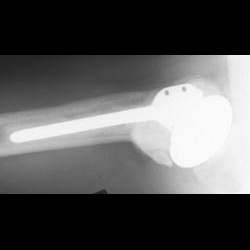

In [64]:
PIL.Image.open(str(Train_data_filepaths[0]))

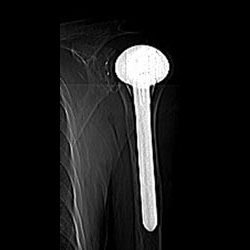

In [65]:
PIL.Image.open(str(Train_data_filepaths[1]))

In [66]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.).flow_from_dataframe(
    dataframe=Train_df,
    directory='/content/data',
    x_col='Train_data_filepaths',
    y_col='Train_data_label',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=123,subset='training')

Found 476 validated image filenames belonging to 4 classes.


In [67]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.).flow_from_dataframe(
    dataframe=Test_df,
    directory='/content/data',
    x_col='Test_data_filepaths',
    y_col='Test_data_label',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=123)

Found 121 validated image filenames belonging to 4 classes.


In [68]:
class_dict = train_generator.class_indices
class_dict
key_list = list(class_dict.keys())
value_list = list(class_dict.values())

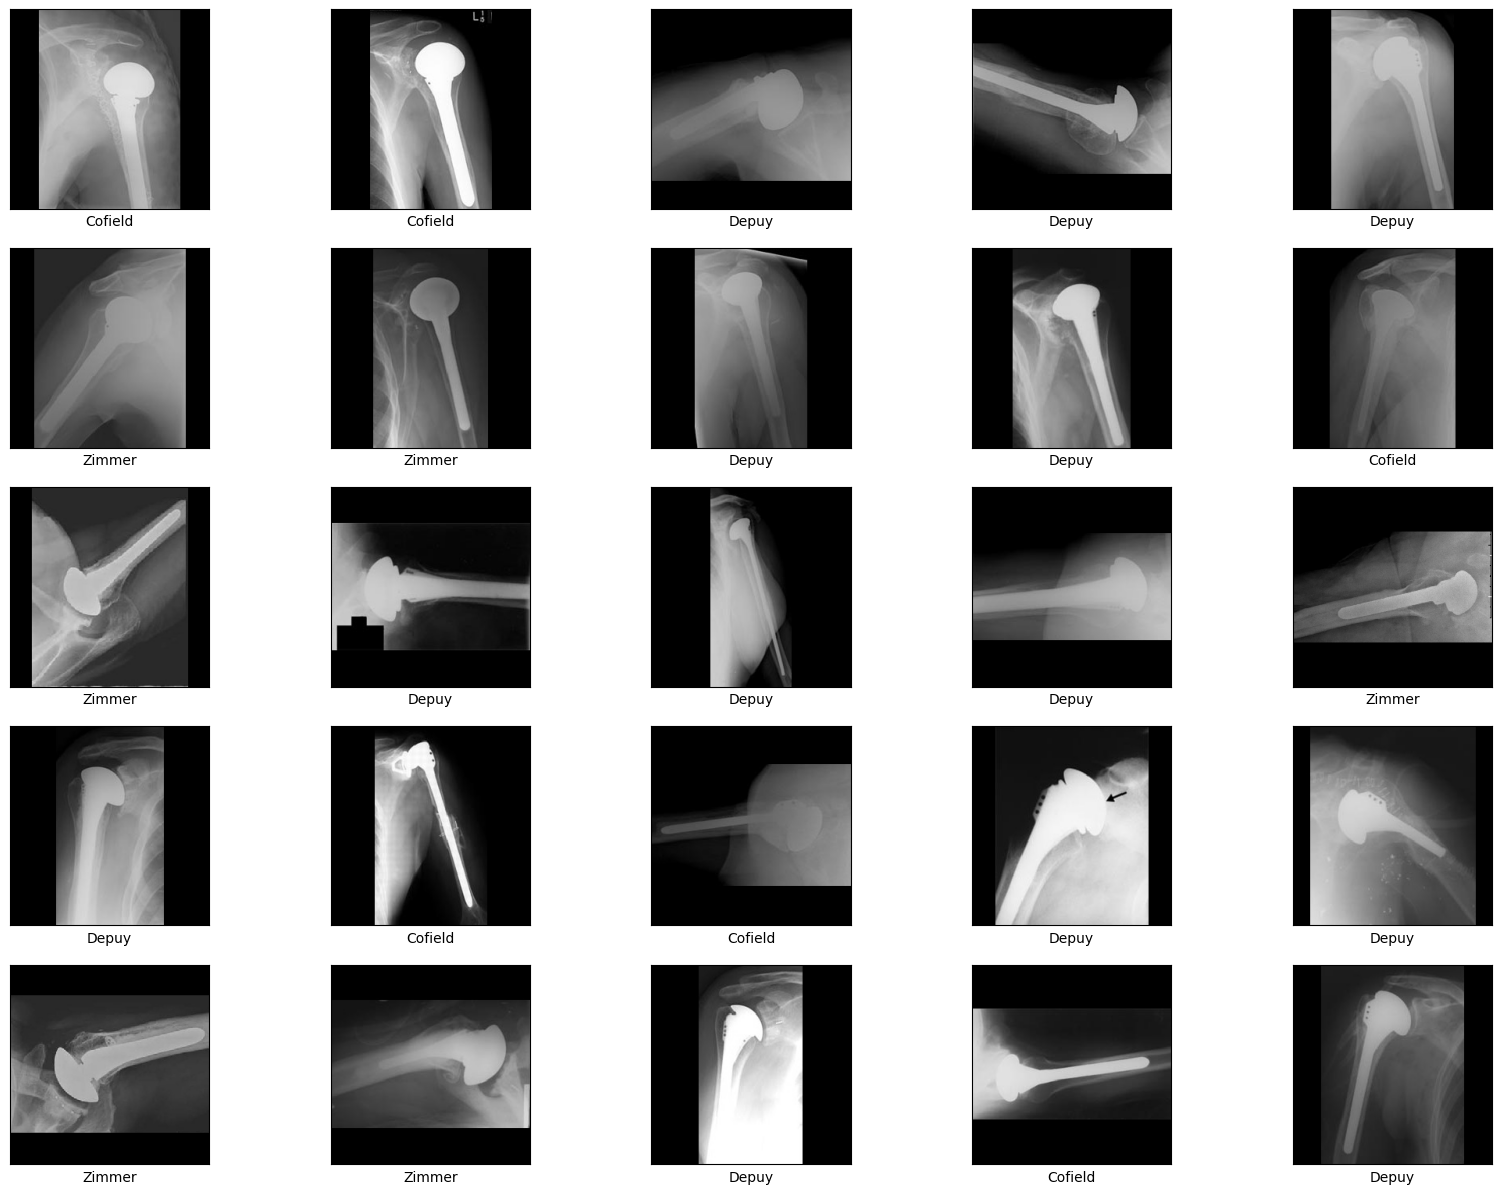

In [69]:
plt.figure(figsize=(20, 15))
images, encoded_labels  = next(train_generator)
labels = np.argmax(encoded_labels,axis =1)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    plt.xlabel(key_list[labels[i]])
plt.show()

In [70]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 4)


##Xray Manufacturer Classification using Convolutional Neural Networks(CNN)

In [71]:
num_classes = len(class_dict)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,412,836 (32.09 MB)

 Trainable params: 8,412,836 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
epochs=20
history = model.fit(train_generator,epochs=epochs)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.5316 - loss: 1.3165
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.4987 - loss: 1.2584
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4536 - loss: 1.2702
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5013 - loss: 1.2404
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5009 - loss: 1.2289
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5140 - loss: 1.2095
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5082 - loss: 1.2302
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5130 - loss: 1.1855
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5056 - loss: 1.2191
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4681 - loss: 1.2577
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5012 - loss: 1.2147
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5107 - 

In [75]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [76]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [77]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,412,836 (32.09 MB)

 Trainable params: 8,412,836 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.2669 - loss: 1.3863


[1.3862476348876953, 0.24793387949466705]

In [80]:
model.predict(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[ 7.08810330e-05,  2.49739387e-04, -2.65770650e-04,
         6.37933845e-04],
       [-1.77998285e-04,  1.02279635e-04, -4.49743413e-04,
         5.01730363e-04],
       [ 6.70691734e-05, -5.13016203e-05, -1.42182864e-04,
         4.21396282e-04],
       [ 6.85670893e-05,  2.74262973e-04, -3.22625245e-04,
         4.50657652e-04],
       [-1.43442288e-04,  3.60063059e-05, -3.71806032e-04,
         5.17572043e-04],
       [-6.73349714e-05,  1.03571583e-04, -4.84402699e-04,
         4.50052845e-04],
       [ 2.53343769e-05,  1.20419296e-04, -1.33383990e-04,
         3.96220130e-04],
       [ 7.65780715e-06,  3.59314072e-05, -1.99850328e-04,
         3.83599749e-04],
       [ 1.61609787e-04,  9.62112317e-05, -1.05994463e-04,
         3.41100822e-04],
       [ 1.63691904e-04,  3.19863975e-05, -7.22163386e-05,
         3.36284953e-04],
       [-1.13265560e-04,  6.06748763e-05, -4.43043537e-04,
         4.22292534e-04],
       [-7.06348801e-05,  5.30333054e-05, -3.28592199e-04,
      

In [81]:
epochs=20
history = model.fit(train_generator,epochs=epochs)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.4519 - loss: 1.3419
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4758 - loss: 1.2948
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4905 - loss: 1.2052
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.4925 - loss: 1.2508
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5241 - loss: 1.2092
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5016 - loss: 1.2317
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5191 - loss: 1.1968
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5531 - loss: 1.1791
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5197 - loss: 1.2291
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4910 - loss: 1.2391
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.4809 - loss: 1.2336
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy:

In [ ]:
model.evaluate(test_generator)

In [ ]:
pred = model.predict(test_generator, verbose = 1)

In [ ]:
pred = [np.argmax(i) for i in pred]
pred

In [ ]:
actual = test_generator.classes
actual

In [ ]:
print(classification_report(actual, pred))